# 🌸 Iris Flower Classification (PyTorch)

## 📌 Introduction
Welcome to the Iris Flower Classification project! The goal of this notebook is to build a machine learning model capable of classifying Iris flowers into three distinct species (Setosa, Versicolor, and Virginica) based on their sepal and petal measurements.

**Project Highlights:**
* **Exploratory Data Analysis:** Checking data distributions and missing values.
* **Deep Learning Model:** Building a custom neural network using **PyTorch**.


## 📌 Introduction
Welcome to the Iris Flower Classification project! The goal of this notebook is to build a machine learning model capable of classifying Iris flowers into three distinct species (Setosa, Versicolor, and Virginica) based on their sepal and petal measurements.

**Project Highlights:**
* **Exploratory Data Analysis:** Checking data distributions and missing values.
* **Deep Learning Model:** Building a custom neural network using **PyTorch**.
* **Model Evaluation:** Evaluating model performance using Accuracy, Classification Reports, and a Confusion Matrix.


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from pathlib import Path

%matplotlib inline

In [2]:
columns = ['Sepal Lenght', 'Sepal Width', 'Petal Length', 'Petal Width',
           'Class_Labels']
df = pd.read_csv("data/iris.data",names=columns)
df.head()

,Sepal Lenght,Sepal Width,Petal Length,Petal Width,Class_Labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,Sepal Lenght,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

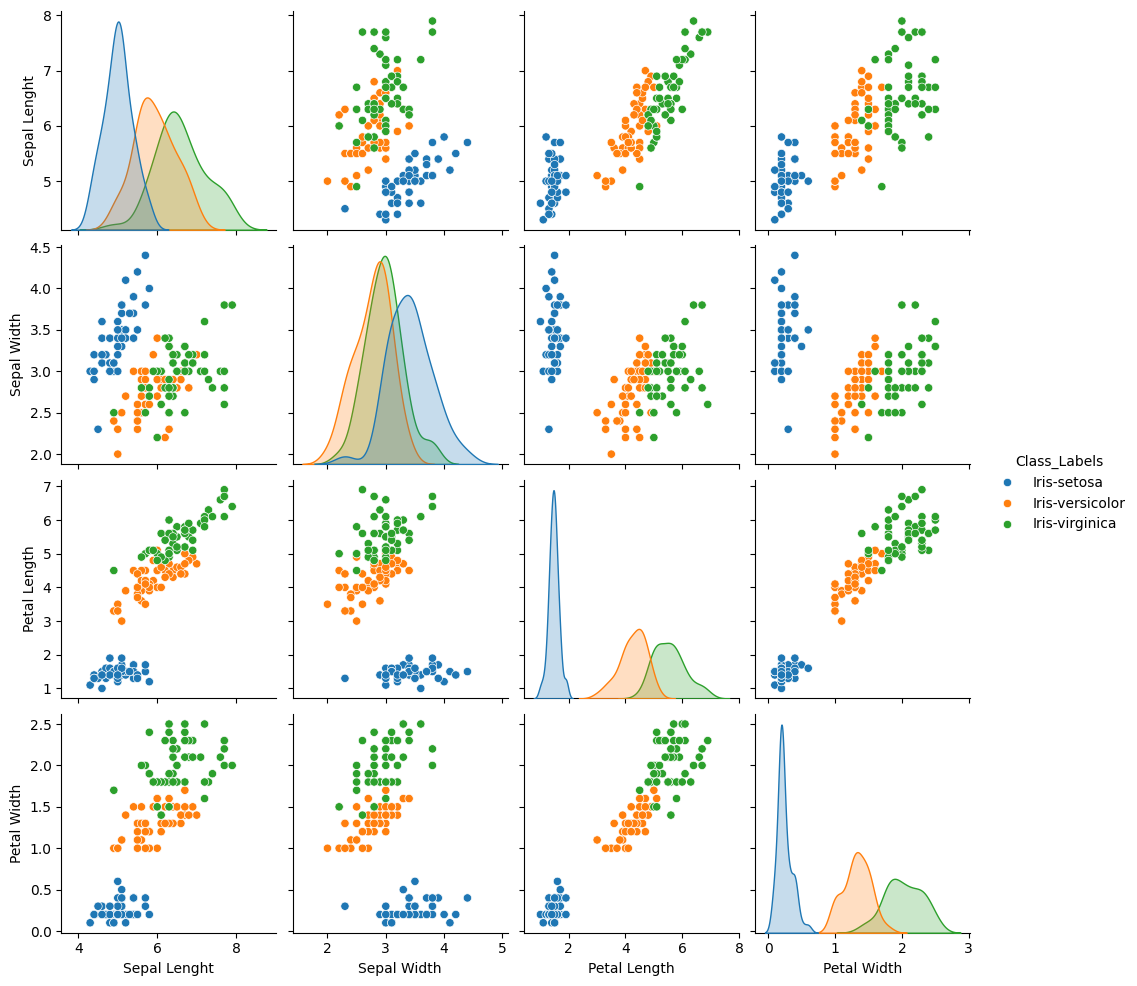

In [5]:
sns.pairplot(df, hue='Class_Labels')


In [6]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

Y

In [7]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:


le = LabelEncoder()
Y = le.fit_transform(Y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

In [12]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [13]:
class Irisnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 8)     
        self.out = nn.Linear(8,3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.out(x)
        return x
        

In [14]:
model = Irisnn()

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [16]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: torch.Size([120, 4])
y_train shape: torch.Size([120])


In [17]:
epochs = 200
for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [20/200], Loss: 0.6061
Epoch [40/200], Loss: 0.1916
Epoch [60/200], Loss: 0.0634
Epoch [80/200], Loss: 0.0409
Epoch [100/200], Loss: 0.0331
Epoch [120/200], Loss: 0.0279
Epoch [140/200], Loss: 0.0239
Epoch [160/200], Loss: 0.0203
Epoch [180/200], Loss: 0.0172
Epoch [200/200], Loss: 0.0143


In [18]:
model.eval()

with torch.no_grad():   
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.67%


In [19]:

print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))


[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [20]:

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "iris_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH )

Saving model to: models\iris_model.pth
